---
title: "Hands - on ML "
description: "Classification, Clustering and Regression"
layout: post
toc: false
comments: false
hide: false
search_exclude: true
categories: [fastpages, jupyter]

---

Repeating content from https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb

In [59]:
import sys, os
import sklearn
import urllib.request
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# matplotlib
import matplotlib
matplotlib.rc('axes', labelsize=14),
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)
print(f'sklearn_version - {sklearn.__version__}')
import seaborn as sns

sklearn_version - 0.24.2


In [2]:
# just copying it from github. Prepreocessing code
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [23]:
!curl https://raw.githubusercontent.com/ageron/handson-ml2/master/oecd_bli_2015.csv

404: Not Found

In [35]:
# download the data
DOWNLOAD_ROOT =  "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
datapath = Path('datasets/lifesat')
datapath.mkdir(exist_ok=True, parents=True )

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    url = '/'.join([DOWNLOAD_ROOT, 'datasets/lifesat',filename])
    filepath = (datapath/filename).resolve()
    print(f'downloading from {url}')
    urllib.request.urlretrieve(url, filepath)

downloading from https://raw.githubusercontent.com/ageron/handson-ml2/master//datasets/lifesat/oecd_bli_2015.csv to /home/achinta/machine-learning/books/handson-ml2/datasets/lifesat/oecd_bli_2015.csv
downloading from https://raw.githubusercontent.com/ageron/handson-ml2/master//datasets/lifesat/gdp_per_capita.csv to /home/achinta/machine-learning/books/handson-ml2/datasets/lifesat/gdp_per_capita.csv


### Plot the data

country stats.shape - (29, 2)


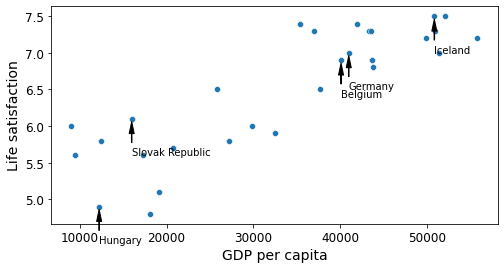

In [83]:
oecd_bli = pd.read_csv(datapath/'oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv(datapath/'gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
print(f'country stats.shape - {country_stats.shape}')

# show the data in a plot
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(x=country_stats['GDP per capita'], y=country_stats['Life satisfaction'], ax=ax)

# lets annotate a few examples
idxs = random.sample(range(country_stats.shape[0]), k=5)
for idx in idxs:
    row = country_stats.iloc[idx]
    plt.annotate(row.name, xy=(row['GDP per capita'], row['Life satisfaction']), 
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5),
                xytext=(row['GDP per capita'],row['Life satisfaction'] - 0.5 ))

plt.show()

### model

In [90]:
import sklearn.linear_model

x=country_stats['GDP per capita'].values
y=country_stats['Life satisfaction'].values
                                                   
model = sklearn.linear_model.LinearRegression()
model.fit(x[:, np.newaxis], y)

LinearRegression()

In [91]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[5.96242338]
